In [23]:
import time
import requests
from bs4 import BeautifulSoup as BS
import csv
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols

In [24]:
import sqlite3
import mysql.connector
import config
from mysql.connector import errorcode
from datetime import date, datetime, timedelta

In [25]:
import re
import os
import time
import random
import requests
import numpy as np
import pandas as pd
from os import system
from math import floor
from copy import deepcopy
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [122]:
df = pd.read_csv('cleaned_data.csv')

In [123]:
df = df.drop('Unnamed: 0',axis=1)

In [124]:
df

,current_date,highest_price,highest_date,lowest_price,lowest_date,asin,category,name,num_reviews,price,product_id,rating,url
0,10,49.99,9,34.99,10,B079QHML21,Electronics,"Fire TV Stick 4K with Alexa Voice Remote, stre...",48229,34.99,B079QHML21,4.5,https://www.amazon.com/Fire-TV-Stick-4K-with-A...
1,10,39.99,8,24.99,10,B0791TX5P5,Electronics,"Fire TV Stick with Alexa Voice Remote, streami...",40788,24.99,B0791TX5P5,4.5,https://www.amazon.com/Fire-TV-Stick-with-Alex...
2,10,49.99,10,24.99,8,B07FZ8S74R,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64398,49.99,B07FZ8S74R,4.6,https://www.amazon.com/Echo-Dot/dp/B07FZ8S74R/...
3,2,24.99,2,19.99,2,B01MZEEFNX,Electronics,"Amazon Smart Plug, works with Alexa – A Certif...",14517,24.99,B01MZEEFNX,4.5,https://www.amazon.com/Amazon-Smart-Plug-works...
4,10,49.99,10,24.99,8,B07PGL2N7J,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64397,49.99,B07PGL2N7J,4.6,https://www.amazon.com/Echo-Dot-3rd-Gen-Sandst...
5,1,199.00,5,85.43,11,B00N2ZDXW2,Electronics,"Ring Video Doorbell with HD Video, Motion Acti...",37812,99.99,B00N2ZDXW2,4.0,https://www.amazon.com/Ring-Wi-Fi-Enabled-Door...
6,10,40.86,9,29.00,10,B076JKHDQT,Electronics,Ring Rechargeable Battery Pack,1527,29.00,B076JKHDQT,4.6,https://www.amazon.com/Ring-8AB1S7-0EU0-Rechar...
7,10,49.99,10,24.99,8,B07PDHSLM6,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64397,49.99,B07PDHSLM6,4.6,https://www.amazon.com/Echo-Dot/dp/B07PDHSLM6/...
8,10,59.99,10,49.99,10,B07N8RPRF7,Electronics,All-new Echo Dot (3rd Gen) - Smart speaker wit...,64397,59.99,B07N8RPRF7,4.6,https://www.amazon.com/Echo-Dot/dp/B07N8RPRF7/...
9,2,49.99,9,19.99,12,B01DFKC2SO,Electronics,Echo Dot (2nd Generation) - Smart speaker with...,137391,39.99,B01DFKC2SO,4.3,https://www.amazon.com/Amazon-Echo-Dot-Portabl...


In [125]:
sorted_by_price_category_df = df.groupby("category")["price"].mean().sort_values()
sorted_by_price_category = sorted_by_price_category_df.index.values.tolist()

In [126]:
category_price_mapper = {}
for i in range(0,len(sorted_by_price_category)):
    category_price_mapper[sorted_by_price_category[i]] = i+1
category_price_mapper 

{'Misc. Supplies': 1,
 'Sports': 2,
 'Spiral-bound': 3,
 'Apparel': 4,
 'Wireless Phone Accessory': 5,
 'Automotive': 6,
 'Grocery': 7,
 'Accessory': 8,
 'Toy': 9,
 'Kitchen': 10,
 'Health and Beauty': 11,
 'Baby Product': 12,
 'Misc.': 13,
 'Electronics': 14,
 'Tools & Home Improvement': 15}

In [127]:
df["category_ordered_by_price"] = df["category"].map(lambda x:category_price_mapper[x])


In [128]:
### df['category_ordered_by_price']

In [129]:
df

,current_date,highest_price,highest_date,lowest_price,lowest_date,asin,category,name,num_reviews,price,product_id,rating,url,category_ordered_by_price
0,10,49.99,9,34.99,10,B079QHML21,Electronics,"Fire TV Stick 4K with Alexa Voice Remote, stre...",48229,34.99,B079QHML21,4.5,https://www.amazon.com/Fire-TV-Stick-4K-with-A...,14
1,10,39.99,8,24.99,10,B0791TX5P5,Electronics,"Fire TV Stick with Alexa Voice Remote, streami...",40788,24.99,B0791TX5P5,4.5,https://www.amazon.com/Fire-TV-Stick-with-Alex...,14
2,10,49.99,10,24.99,8,B07FZ8S74R,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64398,49.99,B07FZ8S74R,4.6,https://www.amazon.com/Echo-Dot/dp/B07FZ8S74R/...,14
3,2,24.99,2,19.99,2,B01MZEEFNX,Electronics,"Amazon Smart Plug, works with Alexa – A Certif...",14517,24.99,B01MZEEFNX,4.5,https://www.amazon.com/Amazon-Smart-Plug-works...,14
4,10,49.99,10,24.99,8,B07PGL2N7J,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64397,49.99,B07PGL2N7J,4.6,https://www.amazon.com/Echo-Dot-3rd-Gen-Sandst...,14
5,1,199.00,5,85.43,11,B00N2ZDXW2,Electronics,"Ring Video Doorbell with HD Video, Motion Acti...",37812,99.99,B00N2ZDXW2,4.0,https://www.amazon.com/Ring-Wi-Fi-Enabled-Door...,14
6,10,40.86,9,29.00,10,B076JKHDQT,Electronics,Ring Rechargeable Battery Pack,1527,29.00,B076JKHDQT,4.6,https://www.amazon.com/Ring-8AB1S7-0EU0-Rechar...,14
7,10,49.99,10,24.99,8,B07PDHSLM6,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64397,49.99,B07PDHSLM6,4.6,https://www.amazon.com/Echo-Dot/dp/B07PDHSLM6/...,14
8,10,59.99,10,49.99,10,B07N8RPRF7,Electronics,All-new Echo Dot (3rd Gen) - Smart speaker wit...,64397,59.99,B07N8RPRF7,4.6,https://www.amazon.com/Echo-Dot/dp/B07N8RPRF7/...,14
9,2,49.99,9,19.99,12,B01DFKC2SO,Electronics,Echo Dot (2nd Generation) - Smart speaker with...,137391,39.99,B01DFKC2SO,4.3,https://www.amazon.com/Amazon-Echo-Dot-Portabl...,14


In [130]:
df.dropna(inplace=True)

In [131]:
#1: 0-10,2: 10-20, 3:20-50, 4: 50-100, 5: 100-700
price_bins = [0,15,40,80,150,700]
bins_price = pd.cut(df['price'],price_bins,labels=[1,2,3,4,5])

In [132]:
bins_price

0      2
1      2
2      3
3      2
4      3
5      4
6      2
7      3
8      3
9      2
10     5
11     4
12     4
13     3
14     3
15     2
16     4
17     3
18     4
19     2
20     2
21     5
22     2
23     2
24     4
25     5
26     4
27     1
28     5
29     4
      ..
342    2
343    2
344    3
345    4
346    2
347    1
348    3
349    3
350    3
351    2
352    5
353    4
354    4
355    3
356    3
357    4
358    3
359    1
360    2
361    5
362    2
363    4
364    2
365    5
366    4
367    2
368    2
369    1
371    2
372    2
Name: price, Length: 369, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [133]:
df['binned_price'] = bins_price

In [134]:
df['binned_price'] = df.binned_price.astype(int)

In [135]:
df.dropna(inplace=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2549d6a0>,
      dtype=object)

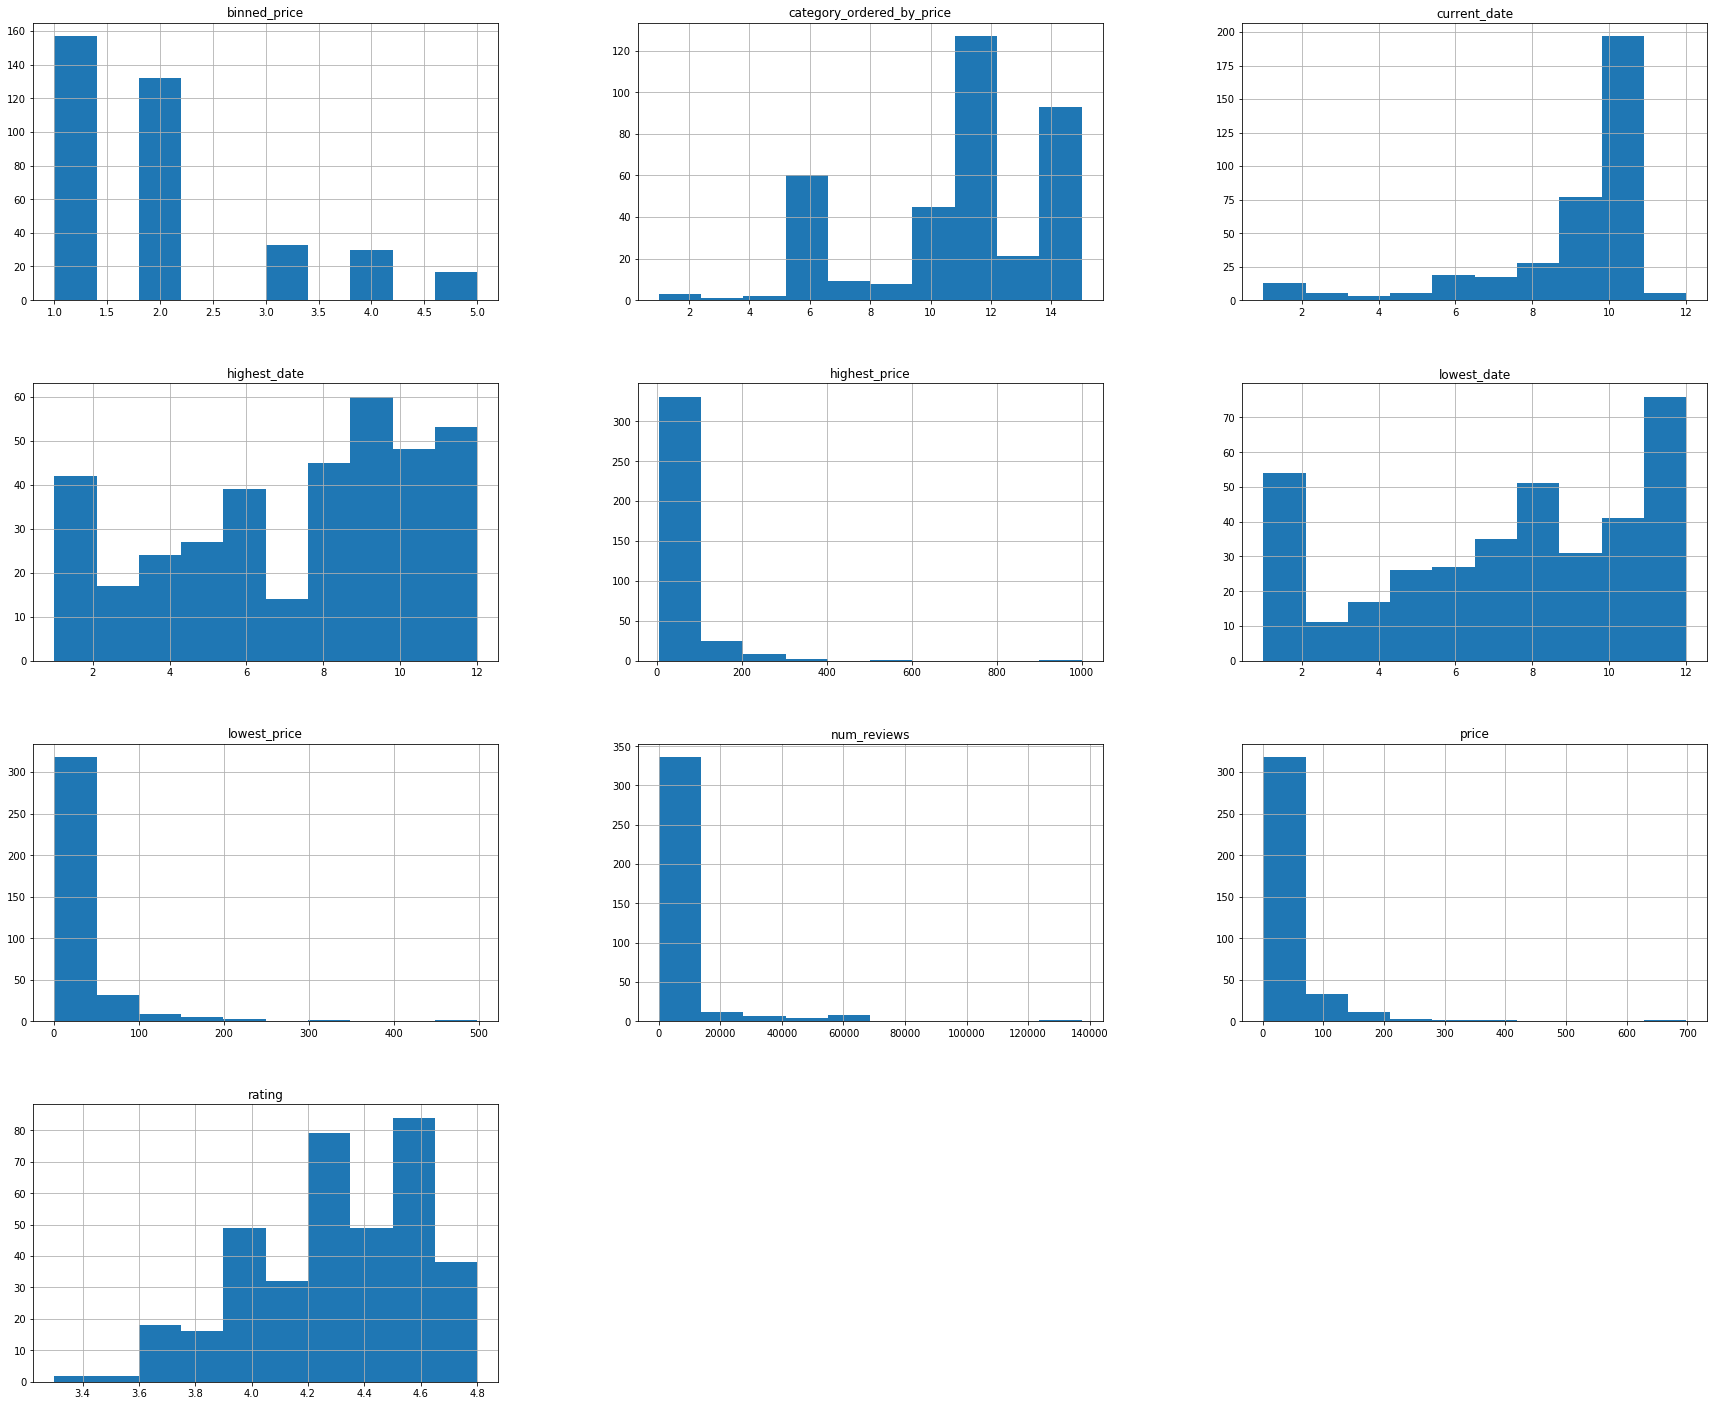

In [136]:
df.hist(figsize=(30,25))

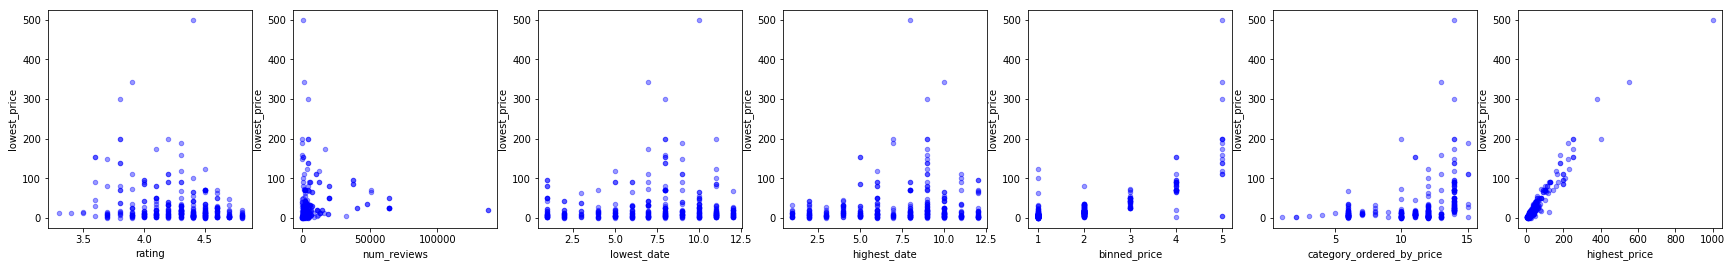

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(30,4))
for xcol, ax in zip(['rating', 'num_reviews', 'lowest_date','highest_date','binned_price','category_ordered_by_price','highest_price'], axes):
    df.plot(kind='scatter', x=xcol, y='lowest_price', ax=ax, alpha=0.4, color='b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1df2f470>,
      dtype=object)

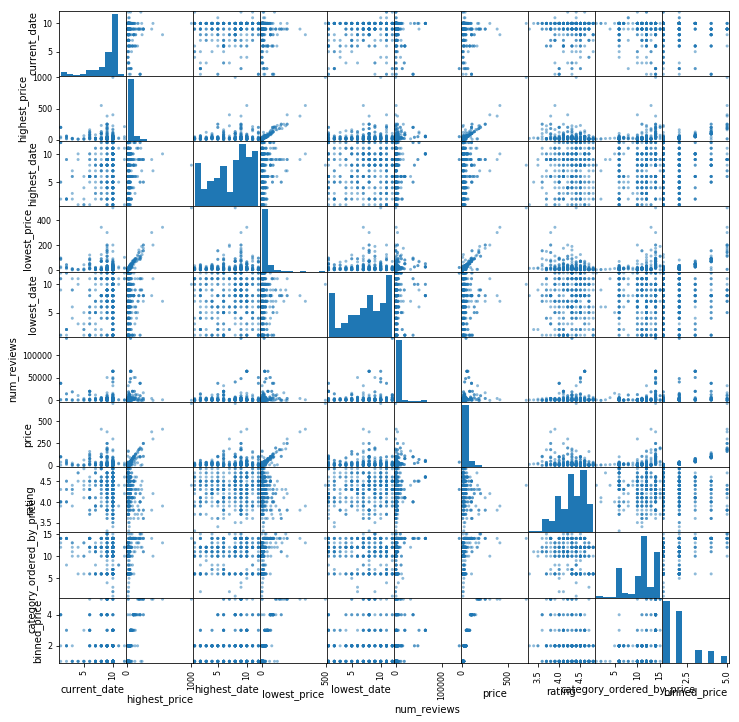

In [110]:
pd.plotting.scatter_matrix(df,figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18c2cd30>,
      dtype=object)

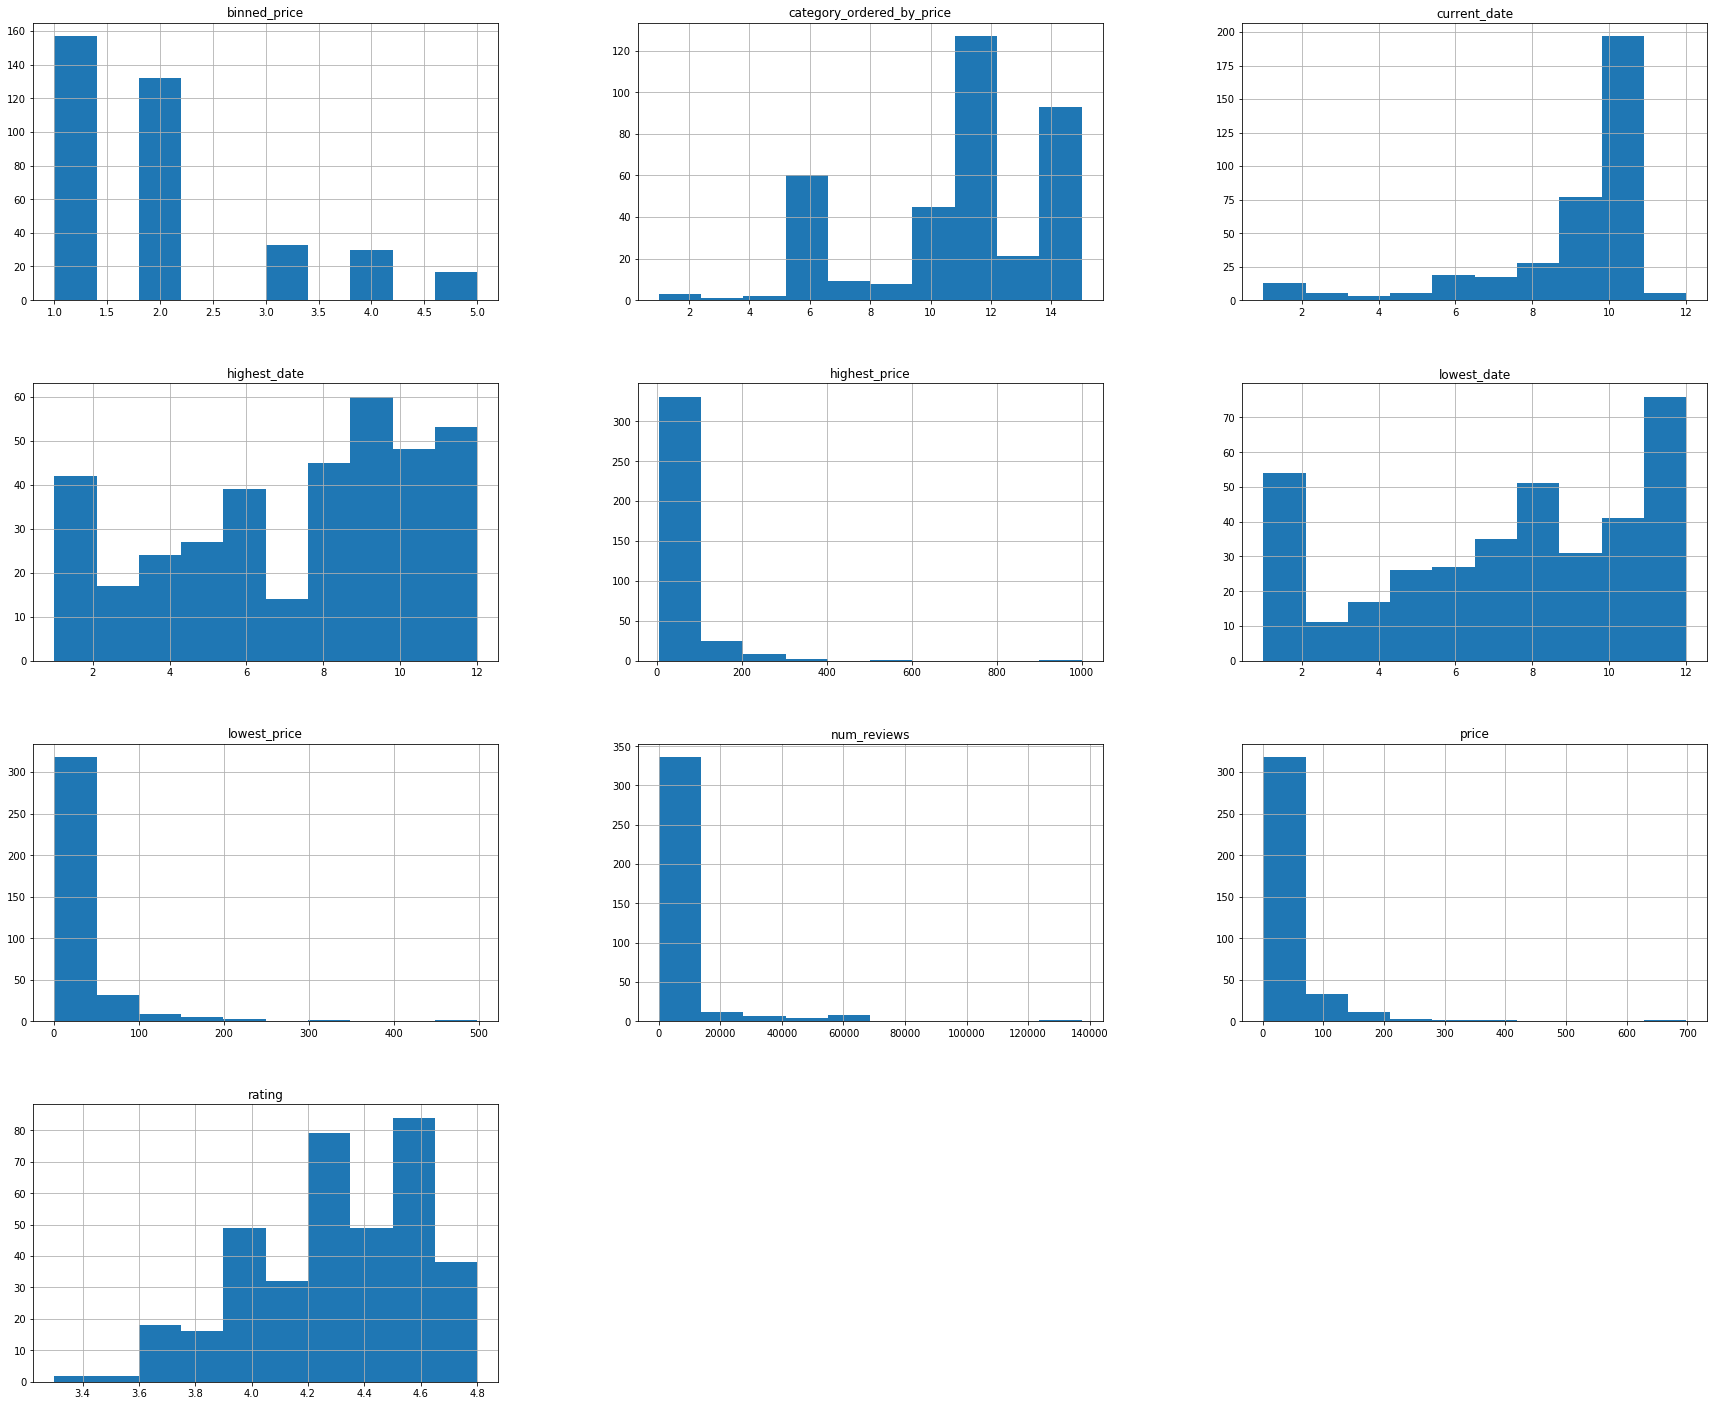

In [111]:
df.hist(figsize=(30,25))

In [112]:
df

,current_date,highest_price,highest_date,lowest_price,lowest_date,asin,category,name,num_reviews,price,product_id,rating,url,category_ordered_by_price,binned_price
0,10,49.99,9,34.99,10,B079QHML21,Electronics,"Fire TV Stick 4K with Alexa Voice Remote, stre...",48229,34.99,B079QHML21,4.5,https://www.amazon.com/Fire-TV-Stick-4K-with-A...,14,2
1,10,39.99,8,24.99,10,B0791TX5P5,Electronics,"Fire TV Stick with Alexa Voice Remote, streami...",40788,24.99,B0791TX5P5,4.5,https://www.amazon.com/Fire-TV-Stick-with-Alex...,14,2
2,10,49.99,10,24.99,8,B07FZ8S74R,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64398,49.99,B07FZ8S74R,4.6,https://www.amazon.com/Echo-Dot/dp/B07FZ8S74R/...,14,3
3,2,24.99,2,19.99,2,B01MZEEFNX,Electronics,"Amazon Smart Plug, works with Alexa – A Certif...",14517,24.99,B01MZEEFNX,4.5,https://www.amazon.com/Amazon-Smart-Plug-works...,14,2
4,10,49.99,10,24.99,8,B07PGL2N7J,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64397,49.99,B07PGL2N7J,4.6,https://www.amazon.com/Echo-Dot-3rd-Gen-Sandst...,14,3
5,1,199.00,5,85.43,11,B00N2ZDXW2,Electronics,"Ring Video Doorbell with HD Video, Motion Acti...",37812,99.99,B00N2ZDXW2,4.0,https://www.amazon.com/Ring-Wi-Fi-Enabled-Door...,14,4
6,10,40.86,9,29.00,10,B076JKHDQT,Electronics,Ring Rechargeable Battery Pack,1527,29.00,B076JKHDQT,4.6,https://www.amazon.com/Ring-8AB1S7-0EU0-Rechar...,14,2
7,10,49.99,10,24.99,8,B07PDHSLM6,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64397,49.99,B07PDHSLM6,4.6,https://www.amazon.com/Echo-Dot/dp/B07PDHSLM6/...,14,3
8,10,59.99,10,49.99,10,B07N8RPRF7,Electronics,All-new Echo Dot (3rd Gen) - Smart speaker wit...,64397,59.99,B07N8RPRF7,4.6,https://www.amazon.com/Echo-Dot/dp/B07N8RPRF7/...,14,3
9,2,49.99,9,19.99,12,B01DFKC2SO,Electronics,Echo Dot (2nd Generation) - Smart speaker with...,137391,39.99,B01DFKC2SO,4.3,https://www.amazon.com/Amazon-Echo-Dot-Portabl...,14,2


In [45]:
# ld_dummies = pd.get_dummies(df['lowest_date'], prefix='ld', drop_first=True)
#ld_dummies

In [46]:
# hd_dummies = pd.get_dummies(df['highest_date'], prefix='hd', drop_first=True)
# hd_dummies

In [47]:
# df.rating.value_counts()

In [48]:
# df.rating.hist()

In [49]:
# bins = [3,3.6,3.8,4,4.2,4.4,4.6,4.8]
# bins_rating = pd.cut(df['rating'],bins)
# bins_rating

In [50]:
# bins_rating = bins_rating.cat.as_ordered()
#bins_rating

In [51]:
# bins_rating.value_counts().plot(kind='bar')

In [52]:
# df.rating = bins_rating
# df.rating = df.rating.cat.codes

In [53]:
df

,current_date,highest_price,highest_date,lowest_price,lowest_date,asin,category,name,num_reviews,price,product_id,rating,url,category_ordered_by_price,binned_price
0,10,49.99,9,34.99,10,B079QHML21,Electronics,"Fire TV Stick 4K with Alexa Voice Remote, stre...",48229,34.99,B079QHML21,4.5,https://www.amazon.com/Fire-TV-Stick-4K-with-A...,14,2
1,10,39.99,8,24.99,10,B0791TX5P5,Electronics,"Fire TV Stick with Alexa Voice Remote, streami...",40788,24.99,B0791TX5P5,4.5,https://www.amazon.com/Fire-TV-Stick-with-Alex...,14,2
2,10,49.99,10,24.99,8,B07FZ8S74R,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64398,49.99,B07FZ8S74R,4.6,https://www.amazon.com/Echo-Dot/dp/B07FZ8S74R/...,14,3
3,2,24.99,2,19.99,2,B01MZEEFNX,Electronics,"Amazon Smart Plug, works with Alexa – A Certif...",14517,24.99,B01MZEEFNX,4.5,https://www.amazon.com/Amazon-Smart-Plug-works...,14,2
4,10,49.99,10,24.99,8,B07PGL2N7J,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64397,49.99,B07PGL2N7J,4.6,https://www.amazon.com/Echo-Dot-3rd-Gen-Sandst...,14,3
5,1,199.00,5,85.43,11,B00N2ZDXW2,Electronics,"Ring Video Doorbell with HD Video, Motion Acti...",37812,99.99,B00N2ZDXW2,4.0,https://www.amazon.com/Ring-Wi-Fi-Enabled-Door...,14,4
6,10,40.86,9,29.00,10,B076JKHDQT,Electronics,Ring Rechargeable Battery Pack,1527,29.00,B076JKHDQT,4.6,https://www.amazon.com/Ring-8AB1S7-0EU0-Rechar...,14,2
7,10,49.99,10,24.99,8,B07PDHSLM6,Electronics,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,64397,49.99,B07PDHSLM6,4.6,https://www.amazon.com/Echo-Dot/dp/B07PDHSLM6/...,14,3
8,10,59.99,10,49.99,10,B07N8RPRF7,Electronics,All-new Echo Dot (3rd Gen) - Smart speaker wit...,64397,59.99,B07N8RPRF7,4.6,https://www.amazon.com/Echo-Dot/dp/B07N8RPRF7/...,14,3
9,2,49.99,9,19.99,12,B01DFKC2SO,Electronics,Echo Dot (2nd Generation) - Smart speaker with...,137391,39.99,B01DFKC2SO,4.3,https://www.amazon.com/Amazon-Echo-Dot-Portabl...,14,2


In [118]:
# rating_dummies = pd.get_dummies(bins_rating, prefix='rating', drop_first=True)
# rating_dummies

In [120]:
# df = pd.concat([df,rating_dummies,hd_dummies,ld_dummies],axis=1)

In [121]:
# df = df.rename(columns={'rating_(3.6, 3.8]':'rating38','rating_(3.8, 4.0]':'rating40','rating_(4.0, 4.2]':'rating42','rating_(4.2, 4.4]':'rating_44','rating_(4.4, 4.6]':'rating46','rating_(4.6, 4.8]':'rating48'})


In [122]:
# df = df.drop(['asin','category','url','name','product_id','current_date','rating','highest_date','lowest_date'],axis=1)

In [54]:
df.columns

Index(['current_date', 'highest_price', 'highest_date', 'lowest_price',
       'lowest_date', 'asin', 'category', 'name', 'num_reviews', 'price',
       'product_id', 'rating', 'url', 'category_ordered_by_price',
       'binned_price'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e28ea58>,
      dtype=object)

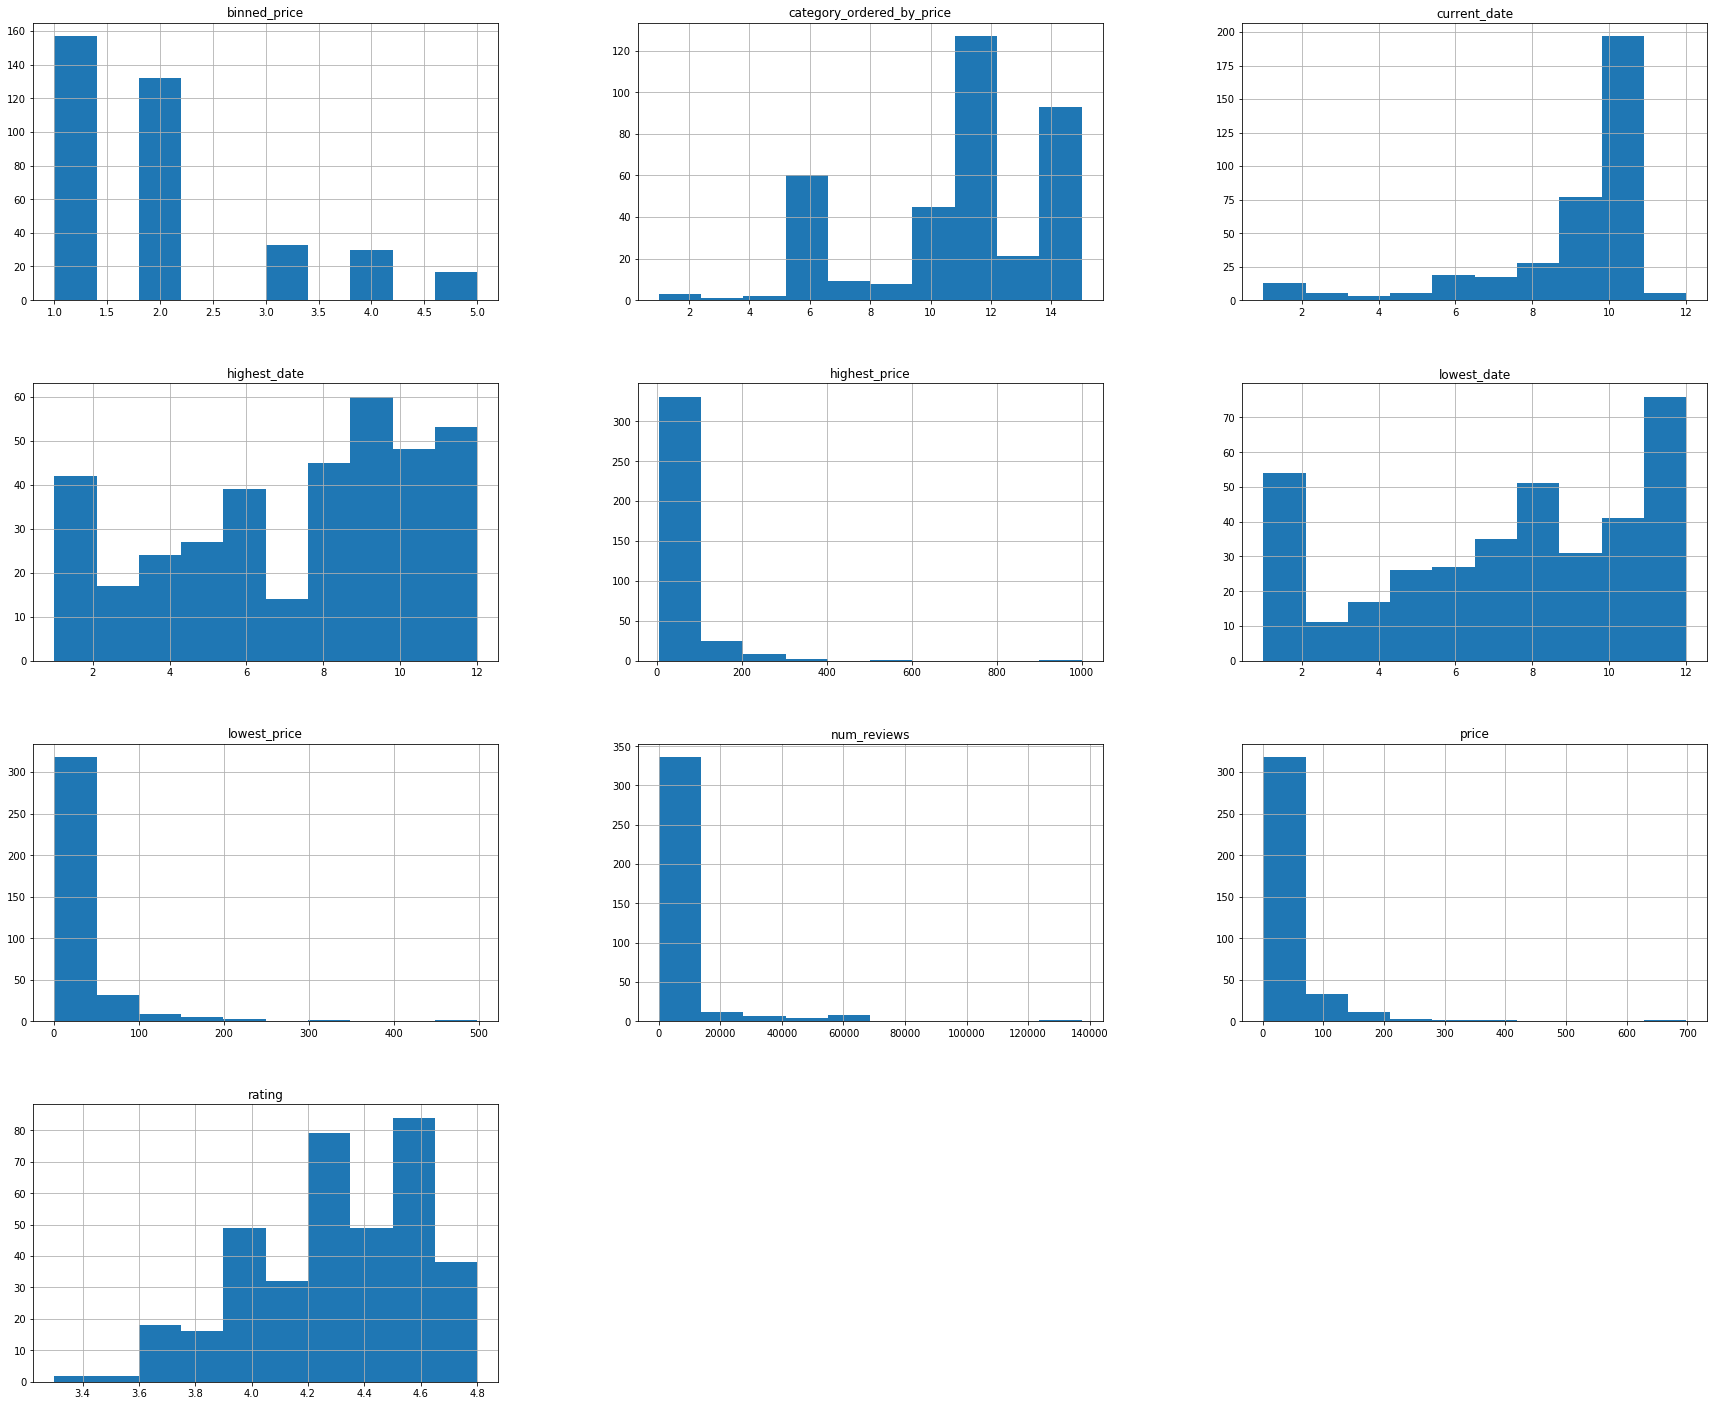

In [55]:
-

In [56]:
df.corr()

,current_date,highest_price,highest_date,lowest_price,lowest_date,num_reviews,price,rating,category_ordered_by_price,binned_price
current_date,1.000000,-0.077304,0.172023,-0.066267,0.157827,-0.242226,-0.079174,0.048763,-0.160274,-0.123525
highest_price,-0.077304,1.000000,0.097439,0.966757,0.073270,0.087493,0.915489,-0.182287,0.284321,0.651817
highest_date,0.172023,0.097439,1.000000,0.121561,0.040099,0.132629,0.113413,0.052516,0.122347,0.111067
lowest_price,-0.066267,0.966757,0.121561,1.000000,0.061685,0.073632,0.936819,-0.205452,0.332368,0.724103
lowest_date,0.157827,0.073270,0.040099,0.061685,1.000000,0.098752,0.029499,0.113948,-0.109503,0.004462
num_reviews,-0.242226,0.087493,0.132629,0.073632,0.098752,1.000000,0.106361,0.109081,0.273557,0.222042
price,-0.079174,0.915489,0.113413,0.936819,0.029499,0.106361,1.000000,-0.162431,0.334701,0.791882
rating,0.048763,-0.182287,0.052516,-0.205452,0.113948,0.109081,-0.162431,1.000000,-0.093306,-0.193395
category_ordered_by_price,-0.160274,0.284321,0.122347,0.332368,-0.109503,0.273557,0.334701,-0.093306,1.000000,0.417721
binned_price,-0.123525,0.651817,0.111067,0.724103,0.004462,0.222042,0.791882,-0.193395,0.417721,1.000000


In [31]:
predictors.columns

Index(['current_date', 'highest_price', 'highest_date', 'lowest_date', 'asin',
       'category', 'name', 'num_reviews', 'price', 'product_id', 'rating',
       'url', 'category_ordered_by_price', 'binned_price'],
      dtype='object')

In [57]:
outcome = 'lowest_price'
predictors = df.drop(['lowest_price','name','url','product_id','asin','category'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [58]:
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     888.2
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          2.78e-239
Time:                        17:08:49   Log-Likelihood:                -1369.9
No. Observations:                 369   AIC:                             2760.
Df Residuals:                     359   BIC:                             2799.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.0870      8.555     -0.244      0.807     -18.911      14.737
current_date                  0.1785      0.277      0.646      0.519      -0.365       0.722
highest_price                 0.4308      0.018     24.460      0.000       0.396       0.465
highest_date                  0.3000      0.174      1.726      0.085      -0.042       0.642
lowest_date                   0.1587      0.163      0.975      0.330      -0.161       0.479
num_reviews                  -0.0001   3.86e-05     -3.168      0.002      -0.000   -4.63e-05
price                         0.1570      0.028      5.665      0.000       0.102       0.211
rating                       -3.2916      1.803     -1.826      0.069      -6.837       0.254
category_ordered_by_price     0.5476      0.203      2.698      0.007       0.148       0.947
binned_price                  3.8089      0.855      4.454      0.000       2.127       5.491
==============================================================================
Omnibus:                       80.051   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1771.806
Skew:                          -0.049   Prob(JB):                         0.00
Kurtosis:                      13.735   Cond. No.                     2.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
y = df.lowest_price


In [59]:
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split

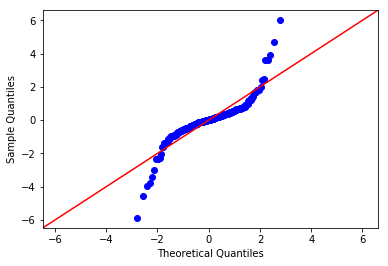

In [47]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [132]:
# rating_cols = ['rating38','rating40','rating42','rating44','rating46','rating48']


In [133]:
# outcome = 'lowest_price'
# rating_cols = ['rating38','rating40','rating42','rating_44','rating46','rating48']
# predictors_rating = '+'.join(rating_cols)
# formula_rating = outcome + '~' + predictors_rating

In [134]:
# model_rating = ols(formula=formula_rating, data=df).fit()
# model_rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.899
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           0.000867
Time:                        20:20:56   Log-Likelihood:                -1958.7
No. Observations:                 373   AIC:                             3931.
Df Residuals:                     366   BIC:                             3959.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4990     14.737      3.630      0.000      24.518      82.480
rating38       5.5364     17.169      0.322      0.747     -28.225      39.298
rating40     -23.2417     16.171     -1.437      0.152     -55.042       8.559
rating42     -22.4001     15.864     -1.412      0.159     -53.596       8.796
rating_44    -25.4591     15.471     -1.646      0.101     -55.882       4.964
rating46     -30.7715     15.561     -1.977      0.049     -61.372      -0.171
rating48     -44.8398     16.563     -2.707      0.007     -77.411     -12.268
==============================================================================
Omnibus:                      405.697   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21263.802
Skew:                           4.774   Prob(JB):                         0.00
Kurtosis:                      38.735   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# outcome = 'lowest_price'
# hd_cols = ['hd_2','hd_3', 'hd_4', 'hd_5', 'hd_6', 'hd_7', 'hd_8', 'hd_9', 'hd_10','hd_11', 'hd_12']
# predictors_hd = '+'.join(hd_cols)
# formula_hd = outcome + '~' + predictors_hd

In [136]:
# model_hd = ols(formula=formula_hd, data=df).fit()
# model_hd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.042
Date:                Thu, 17 Oct 2019   Prob (F-statistic):             0.0239
Time:                        20:21:00   Log-Likelihood:                -1959.0
No. Observations:                 373   AIC:                             3942.
Df Residuals:                     361   BIC:                             3989.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7047     12.126      0.883      0.378     -13.141      34.551
hd_2           4.0898     15.124      0.270      0.787     -25.652      33.831
hd_3          -1.2123     16.636     -0.073      0.942     -33.929      31.504
hd_4           9.3691     15.457      0.606      0.545     -21.029      39.767
hd_5          17.0742     15.124      1.129      0.260     -12.667      46.816
hd_6          17.1241     14.219      1.204      0.229     -10.838      45.086
hd_7          21.5860     16.878      1.279      0.202     -11.606      54.778
hd_8          22.7371     14.002      1.624      0.105      -4.798      50.272
hd_9          39.8790     13.557      2.942      0.003      13.218      66.540
hd_10         15.2997     13.892      1.101      0.271     -12.019      42.619
hd_11         13.4449     15.338      0.877      0.381     -16.718      43.608
hd_12         13.7515     14.936      0.921      0.358     -15.621      43.124
==============================================================================
Omnibus:                      403.962   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20358.326
Skew:                           4.758   Prob(JB):                         0.00
Kurtosis:                      37.919   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# outcome = 'lowest_price'
# ld_cols = ['ld_2','ld_3', 'ld_4', 'ld_5', 'ld_6', 'ld_7', 'ld_8', 'ld_9', 'ld_10','ld_11', 'ld_12']
# predictors_ld = '+'.join(ld_cols)
# formula_ld = outcome + '~' + predictors_ld

In [138]:
# model_ld = ols(formula=formula_ld, data=df).fit()
# model_ld.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.058
Date:                Thu, 17 Oct 2019   Prob (F-statistic):             0.0227
Time:                        20:21:02   Log-Likelihood:                -1958.9
No. Observations:                 373   AIC:                             3942.
Df Residuals:                     361   BIC:                             3989.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9291      8.052      2.972      0.003       8.094      39.764
ld_2         -11.6196     13.231     -0.878      0.380     -37.639      14.400
ld_3          -4.5264     16.286     -0.278      0.781     -36.554      27.502
ld_4          -9.3485     13.947     -0.670      0.503     -36.776      18.079
ld_5          -2.7860     12.232     -0.228      0.820     -26.841      21.269
ld_6          -1.0238     11.982     -0.085      0.932     -24.587      22.540
ld_7          12.5046     11.306      1.106      0.269      -9.729      34.738
ld_8          26.5878     10.355      2.568      0.011       6.224      46.952
ld_9          10.7680     11.660      0.924      0.356     -12.162      33.698
ld_10         10.4380     10.891      0.958      0.338     -10.979      31.855
ld_11          0.7492     10.571      0.071      0.944     -20.039      21.537
ld_12        -10.2091     11.660     -0.876      0.382     -33.139      12.721
==============================================================================
Omnibus:                      400.172   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19469.094
Skew:                           4.697   Prob(JB):                         0.00
Kurtosis:                      37.124   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
outcome = 'lowest_price'
predictors_final = df.drop(['lowest_price','name','url','product_id','asin','category','price','current_date','highest_date','lowest_date'], axis=1)
pred_final = '+'.join(predictors_final)
formula_final = outcome + '~' + pred_final

In [60]:
predictors_final

,highest_price,num_reviews,rating,category_ordered_by_price,binned_price
0,49.99,48229,4.5,14,2
1,39.99,40788,4.5,14,2
2,49.99,64398,4.6,14,3
3,24.99,14517,4.5,14,2
4,49.99,64397,4.6,14,3
5,199.00,37812,4.0,14,4
6,40.86,1527,4.6,14,2
7,49.99,64397,4.6,14,3
8,59.99,64397,4.6,14,3
9,49.99,137391,4.3,14,2


In [53]:
model_final = ols(formula=formula_final, data=df).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1456.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):          1.13e-237
Time:                        09:33:55   Log-Likelihood:                -1388.3
No. Observations:                 369   AIC:                             2789.
Df Residuals:                     363   BIC:                             2812.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -8.4447      8.478     -0.996      0.320     -25.117       8.228
highest_price                 0.5182      0.009     56.310      0.000       0.500       0.536
num_reviews                  -0.0001   3.84e-05     -3.687      0.000      -0.000   -6.61e-05
rating                       -1.6514      1.856     -0.890      0.374      -5.302       1.999
category_ordered_by_price     0.5423      0.209      2.595      0.010       0.131       0.953
binned_price                  6.8893      0.692      9.960      0.000       5.529       8.250
==============================================================================
Omnibus:                      125.773   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2604.032
Skew:                           0.880   Prob(JB):                         0.00
Kurtosis:                      15.895   Cond. No.                     2.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
x_train, x_test, y_train, y_test = train_test_split(predictors_final,y, test_size=0.2)

In [62]:
lm = linear_model.LinearRegression()
model_test = lm.fit(x_train,y_train)
prediction = lm.predict(x_test)

Text(0, 0.5, 'Predictions')

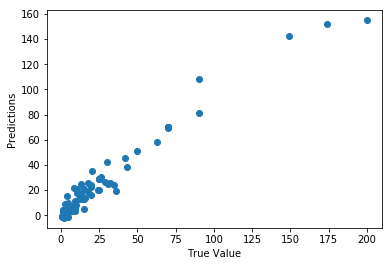

In [63]:
plt.scatter(y_test, prediction)
plt.xlabel('True Value')
plt.ylabel('Predictions')

In [65]:
print('Score', model_test.score(x_test,y_test))

Score 0.9506381941869929


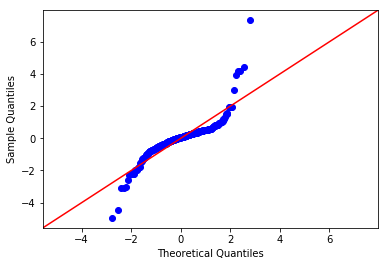

In [56]:
fig = sm.graphics.qqplot(model_final.resid, dist=stats.norm, line='45', fit=True)

In [80]:
x_cols = ['highest_price','num_reviews','price','rating']
def regression_model(val_lst):
    for i, val in enumerate(val_lst):
        f= 'lowest_price~' + val
        model = ols(formula=f, data=df).fit()
        
        X_new = pd.DataFrame({val:[df[val].min(),df[val].max()]})
        preds = model.predict(X_new)
        df.plot(kind='scatter', x=val, y='lowest_price')
        plt.plot(X_new, preds, c='red', linewidth=2)
        plt.show()
        fig = plt.figure(figsize=(15,8))
        fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
        fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
        print(model.summary())

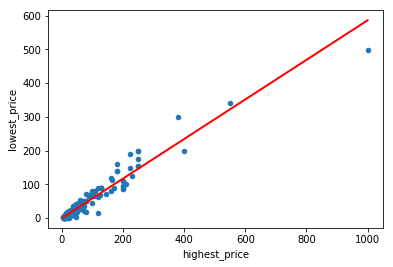

                            OLS Regression Results                            
Dep. Variable:           lowest_price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     5246.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):          1.86e-219
Time:                        11:32:25   Log-Likelihood:                -1447.3
No. Observations:                 369   AIC:                             2899.
Df Residuals:                     367   BIC:                             2906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3229      0.753     -0.429

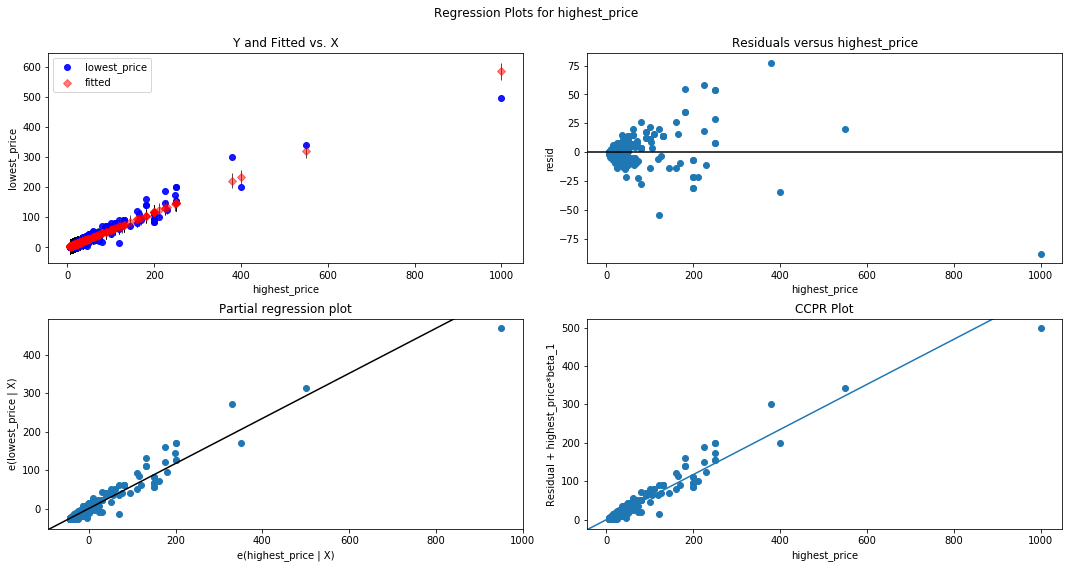

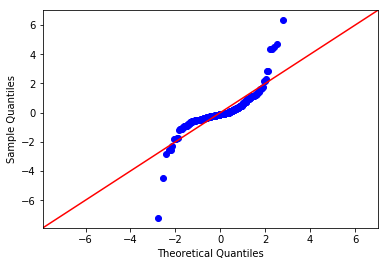

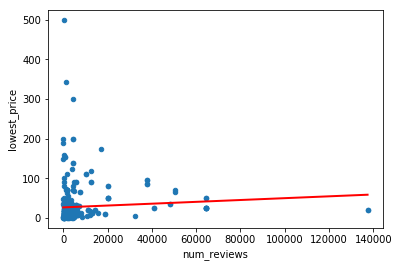

                            OLS Regression Results                            
Dep. Variable:           lowest_price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.001
Date:                Fri, 18 Oct 2019   Prob (F-statistic):              0.158
Time:                        11:32:25   Log-Likelihood:                -1949.5
No. Observations:                 369   AIC:                             3903.
Df Residuals:                     367   BIC:                             3911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.1626      2.689     10.101      

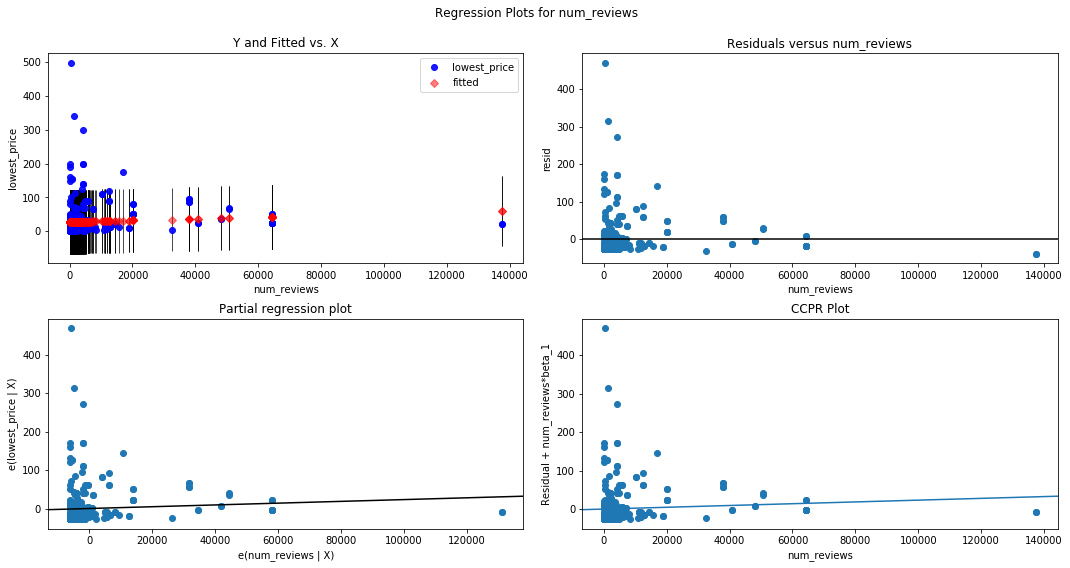

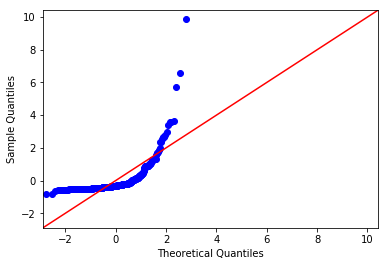

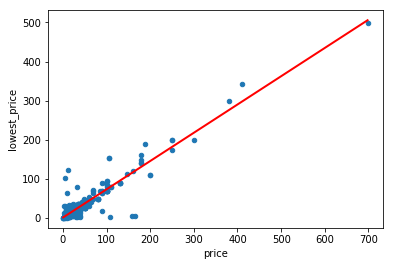

                            OLS Regression Results                            
Dep. Variable:           lowest_price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     2632.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):          1.72e-169
Time:                        11:32:26   Log-Likelihood:                -1562.9
No. Observations:                 369   AIC:                             3130.
Df Residuals:                     367   BIC:                             3138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2333      1.023      1.206      0.2

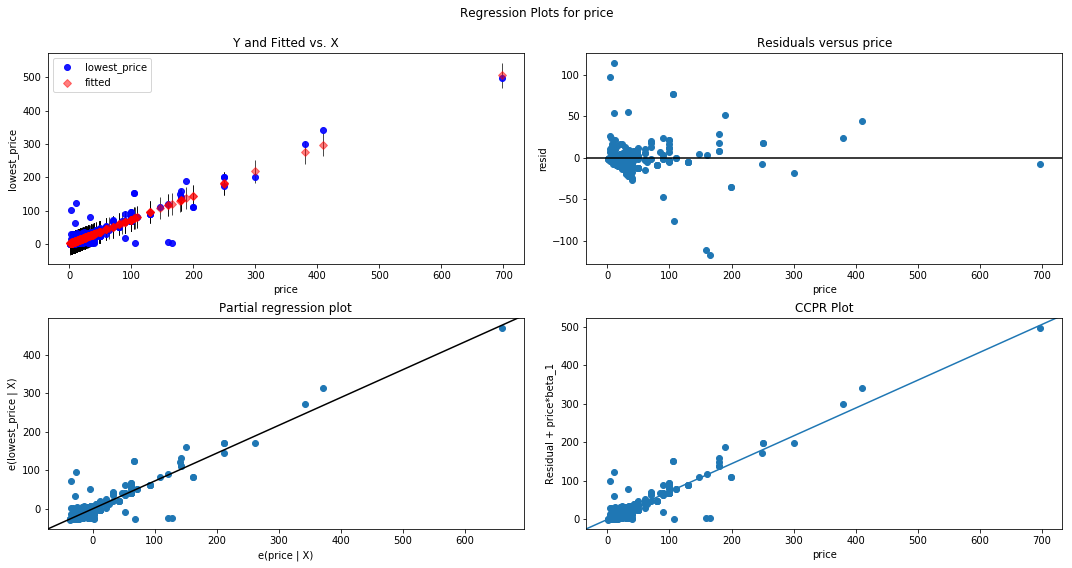

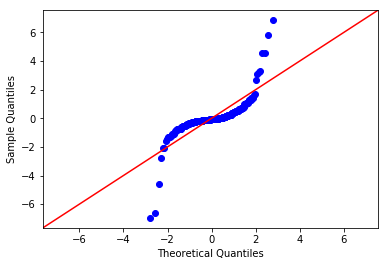

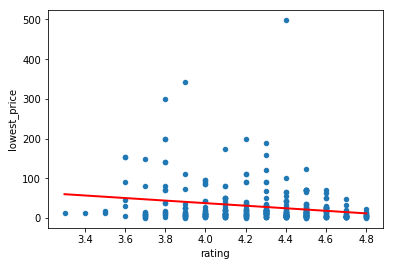

                            OLS Regression Results                            
Dep. Variable:           lowest_price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     16.17
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           7.02e-05
Time:                        11:32:27   Log-Likelihood:                -1942.5
No. Observations:                 369   AIC:                             3889.
Df Residuals:                     367   BIC:                             3897.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    166.3938     34.348      4.844      0.0

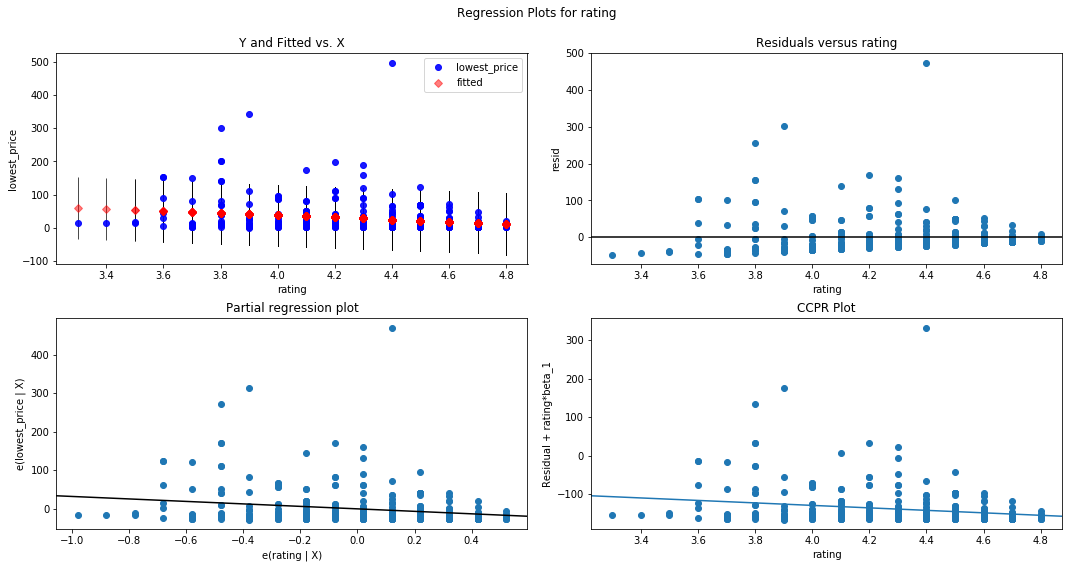

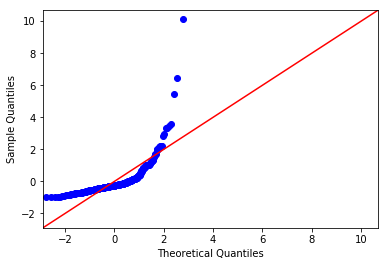

In [81]:
regression_model(x_cols)

In [138]:
outcome = 'lowest_price'
predictors_test = df.drop(['highest_price', 'lowest_price', 'asin', 'name', 'price',
       'product_id', 'rating', 'url', 'category_ordered_by_price',
       'binned_price'], axis=1)
pred_test = '+'.join(predictors_test)
formula_test = outcome + '~' + pred_test

In [139]:
predictors_test

,current_date,highest_date,lowest_date,category,num_reviews
0,10,9,10,Electronics,48229
1,10,8,10,Electronics,40788
2,10,10,8,Electronics,64398
3,2,2,2,Electronics,14517
4,10,10,8,Electronics,64397
5,1,5,11,Electronics,37812
6,10,9,10,Electronics,1527
7,10,10,8,Electronics,64397
8,10,10,10,Electronics,64397
9,2,9,12,Electronics,137391


In [120]:
model_test = ols(formula=formula_test, data=df).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           lowest_price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     6.126
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           5.17e-13
Time:                        17:32:28   Log-Likelihood:                -1900.0
No. Observations:                 369   AIC:                             3838.
Df Residuals:                     350   BIC:                             3912.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                8.8602     20.392      0.435      0.664     -31.245      48.966
category[T.Apparel]                    -18.5492     46.323     -0.400      0.689    -109.656      72.558
category[T.Automotive]                  -7.7805     18.346     -0.424      0.672     -43.863      28.302
category[T.Baby Product]                -3.7073     18.110     -0.205      0.838     -39.325      31.910
category[T.Electronics]                 51.0148     18.233      2.798      0.005      15.154      86.875
category[T.Grocery]                     -9.4863     22.641     -0.419      0.675     -54.015      35.043
category[T.Health and Beauty]            0.5927     18.683      0.032      0.975     -36.153      37.339
category[T.Kitchen]                     -6.2767     18.641     -0.337      0.737     -42.939      30.386
category[T.Misc.]                       20.2236     19.860      1.018      0.309     -18.835      59.283
category[T.Misc. Supplies]             -25.5401     46.368     -0.551      0.582    -116.734      65.654
category[T.Spiral-bound]               -14.8430     46.303     -0.321      0.749    -105.909      76.223
category[T.Sports]                     -13.5024     35.046     -0.385      0.700     -82.429      55.424
category[T.Tools & Home Improvement]    58.6530     24.753      2.370      0.018       9.970     107.336
category[T.Toy]                        -15.2739     35.017     -0.436      0.663     -84.143      53.595
category[T.Wireless Phone Accessory]     0.0355     46.410      0.001      0.999     -91.241      91.312
current_date                            -0.8676      1.191     -0.729      0.467      -3.210       1.475
highest_date                             1.2845      0.748      1.717      0.087      -0.187       2.756
lowest_date                              1.4727      0.692      2.128      0.034       0.112       2.834
num_reviews                             -0.0005      0.000     -3.167      0.002      -0.001      -0.000
==============================================================================
Omnibus:                      411.050   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23389.876
Skew:                           4.928   Prob(JB):                         0.00
Kurtosis:                      40.738   Cond. No.                     5.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
df.columns

Index(['current_date', 'highest_price', 'highest_date', 'lowest_price',
       'lowest_date', 'asin', 'category', 'name', 'num_reviews', 'price',
       'product_id', 'rating', 'url', 'category_ordered_by_price',
       'binned_price'],
      dtype='object')